In [2]:
import sys
sys.path.append('..') 
import matplotlib.pyplot as plt
import configs.config_all as cfg
import pandas as pd
import imageio
import numpy as np

In [2]:
ifimage = pd.read_csv('/data/HPA-IF-images/IF-image.csv')
ifimage = ifimage[ifimage.latest_version == 23]

/tmp/ipykernel_477811/3777263070.py:1: DtypeWarning: Columns (7,8,14,16,18,19,33) have mixed types. Specify dtype option on import or set low_memory=False.
  ifimage = pd.read_csv('/data/HPA-IF-images/IF-image.csv')


In [3]:
mask_dir = "/data/kaggle-dataset/PUBLICHPA/mask/test"
image_dir = "/data/HPA-IF-images"
nuclei_mask_extension = "nucleimask.png"
cell_mask_extension = "cellmask.png"

def read(img_id, image_dir = image_dir, mask_dir = mask_dir, nuclei_mask_extension = nuclei_mask_extension, cell_mask_extension = cell_mask_extension):
    cell_mask = imageio.imread(f"{mask_dir}/{img_id}_{cell_mask_extension}")
    nuclei_mask = imageio.imread(f"{mask_dir}/{img_id}_{nuclei_mask_extension}")
    protein = imageio.imread(
        f"{image_dir}/{img_id.split('_')[0]}/{img_id}_green.png"
    )
    mt = imageio.imread(
        f"{image_dir}/{img_id.split('_')[0]}/{img_id}_red.png"
    )
    er = imageio.imread(
        f"{image_dir}/{img_id.split('_')[0]}/{img_id}_yellow.png"
    )
    nu = imageio.imread(
        f"{image_dir}/{img_id.split('_')[0]}/{img_id}_blue.png"
    )
    return mt, protein, nu, er, cell_mask, nuclei_mask

from skimage import img_as_float
from skimage import exposure

def sharpen(image, percentiles=(1, 99)):
    image = img_as_float(image)
    p2, p98 = np.percentile(image, percentiles)
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))
    return img_rescale

/tmp/ipykernel_477811/4017046985.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cell_mask = imageio.imread(f"{mask_dir}/{img_id}_{cell_mask_extension}")
/tmp/ipykernel_477811/4017046985.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  nuclei_mask = imageio.imread(f"{mask_dir}/{img_id}_{nuclei_mask_extension}")
/tmp/ipykernel_477811/4017046985.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


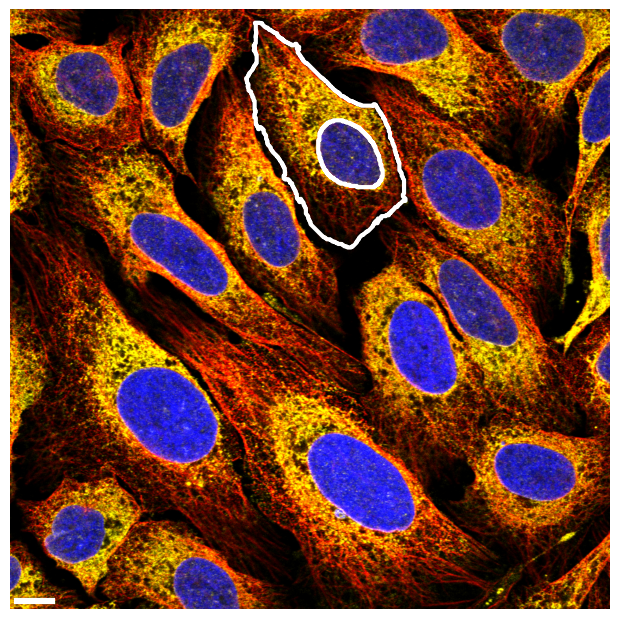

In [8]:

from matplotlib.patches import Rectangle

pixel_size = 0.08  # μm/pixel
scale_bar_length_um = 10  # desired length in μm
scale_bar_pixels = int(scale_bar_length_um / pixel_size)

if False: #for i in range(3): #for cell_line in cfg.CELL_LINE:
    cell_line = "U2OS"
    imid = ifimage[ifimage.atlas_name == cell_line].sample(1).filename.values[0]
    imid = imid.split('/')[-1][:-1]
    print(imid)
if True:
#    imid = "1446_H4_3" # "BJ [Human fibroblast]", cell 7
#    imid = "1376_D5_3" # U2OS
    imid = "1089_B1_2" # U2OS, cell 8
#    imid = "827_F9_3" # A-431
#    imid = "579_D1_1" # U-251MG
#    imid = "1356_B3_1" # MCF7
#    imid = "866_H3_1" # HEK293
#    imid = "1375_C1_2" # RT-4, cell 20
#    imid = "1145_A4_1" # Hep-G2, cell 20
#    imid = "2007_F7_2" # HEL, cell 10
#    imid = "2054_G5_4" # K-562, cell 20
    mt, protein, nu, er, cell_mask, nuclei_mask = read(imid)
    rgb = np.stack([sharpen(mt) + sharpen(er), sharpen(er), sharpen(nu)], axis=-1)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(rgb)
    ax.contour(cell_mask == 5, colors='white', linewidths=3, alpha=1)
    ax.contour(nuclei_mask == 5, colors='white', linewidths=3, alpha=1)

    # Add scale bar in bottom left
    bar_height = 6
    bar_x = 20
    bar_y = rgb.shape[0] - 30
    scale_bar = Rectangle(
        (bar_x, bar_y),
        scale_bar_pixels,
        bar_height,
        linewidth=3,
        edgecolor='white',
        facecolor='white'
    )
    ax.add_patch(scale_bar)

    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

/tmp/ipykernel_477811/2636413993.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cell_mask = imageio.imread(f"{mask_dir}/{antibody}/{img_id}_{cell_mask_extension}")


/tmp/ipykernel_477811/2636413993.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  nuclei_mask = imageio.imread(f"{mask_dir}/{antibody}/{img_id}_{nuclei_mask_extension}")
/tmp/ipykernel_477811/2636413993.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  protein = imageio.imread(f"{image_dir}/{antibody}/{img_id}_w4_Rescaled.tif")


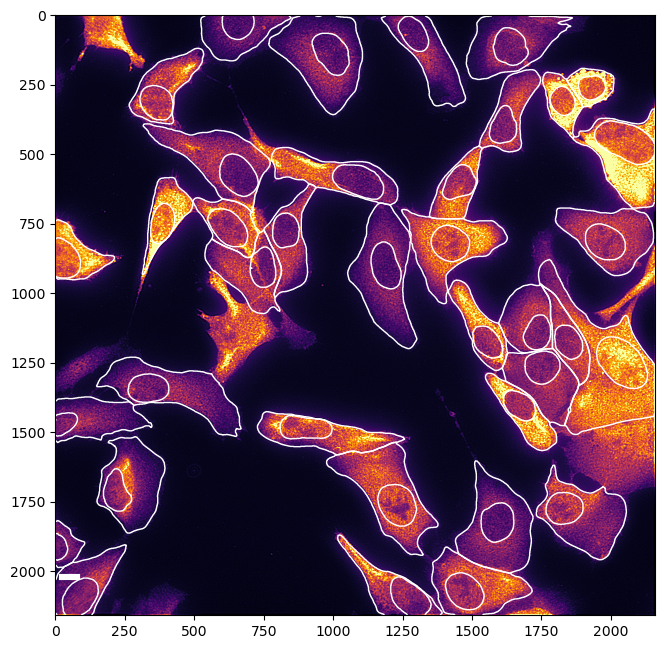

In [59]:
mask_dir = "/data/2Dshapespace/S-BIAD34/cell_masks"
image_dir = "/data/2Dshapespace/S-BIAD34/Files"
nuclei_mask_extension = "nucleimask.png"
cell_mask_extension = "cellmask.png"


def read_sbiad34(antibody, img_id, image_dir = image_dir, mask_dir = mask_dir, nuclei_mask_extension = nuclei_mask_extension, cell_mask_extension=cell_mask_extension):
    cell_mask = imageio.imread(f"{mask_dir}/{antibody}/{img_id}_{cell_mask_extension}")
    nuclei_mask = imageio.imread(f"{mask_dir}/{antibody}/{img_id}_{nuclei_mask_extension}")
    protein = imageio.imread(f"{image_dir}/{antibody}/{img_id}_w4_Rescaled.tif")
    return protein, cell_mask, nuclei_mask

pixel_size = 0.1625 # μm/pixel, for S-BIAD34
scale_bar_length_um = 10  # desired length in μm
scale_bar_pixels = int(scale_bar_length_um / pixel_size)


if True:
    imid, abid = '5977_C05_s4', "HPA003216"
    #imid, abid = '5984_F03_s5', "HPA043803"
    #imid, abid = '5977_E06_s1', "HPA022243"
    #imid, abid = '5985_C07_s5', "HPA060948"
    #imid, abid = '5985_A10_s4', "HPA075624"
    protein, cell_mask, nuclei_mask = read_sbiad34(abid, imid)

    fig, ax = plt.subplots(figsize=(6, 6))
    
    ax.imshow(protein, cmap='inferno', vmin=0, vmax=np.percentile(protein, 99))
    for i in range(1, np.max(cell_mask) + 1):
        ax.contour(cell_mask == i, colors='white', linewidths=1, alpha=1) 
        ax.contour(nuclei_mask == i, colors='white', linewidths=1, alpha=1) 
    
    # Add scale bar in bottom left
    bar_height = 6
    bar_x = 20
    bar_y = rgb.shape[0] - 30
    scale_bar = Rectangle(
        (bar_x, bar_y),
        scale_bar_pixels,
        bar_height,
        linewidth=3,
        edgecolor='white',
        facecolor='white'
    )
    ax.add_patch(scale_bar)
    #ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

/tmp/ipykernel_477811/3323823856.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cell_mask = imageio.imread(f"{mask_dir}/{antibody}/{img_id}_{cell_mask_extension}")
/tmp/ipykernel_477811/3323823856.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  nuclei_mask = imageio.imread(f"{mask_dir}/{antibody}/{img_id}_{nuclei_mask_extension}")
/tmp/ipykernel_477811/3323823856.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imagei

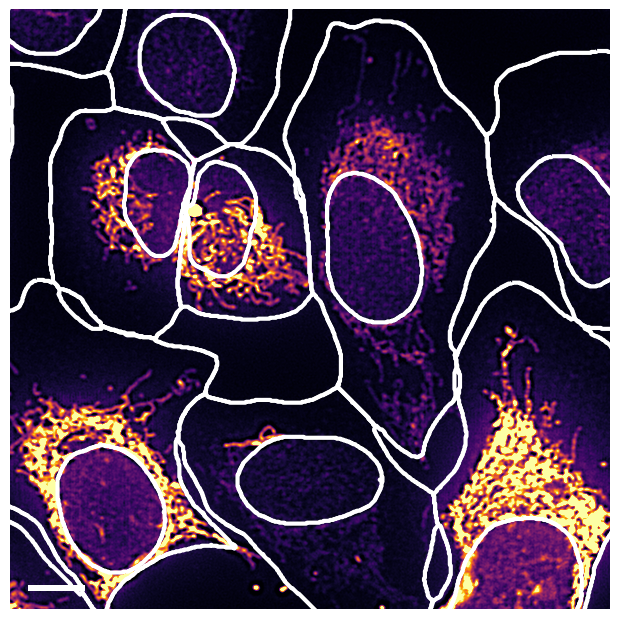

In [66]:
mask_dir = "/data/2Dshapespace/S-BIAD34/cell_masks"
image_dir = "/data/2Dshapespace/S-BIAD34/Files"
nuclei_mask_extension = "nucleimask.png"
cell_mask_extension = "cellmask.png"


def read_sbiad34(antibody, img_id, image_dir = image_dir, mask_dir = mask_dir, nuclei_mask_extension = nuclei_mask_extension, cell_mask_extension=cell_mask_extension):
    cell_mask = imageio.imread(f"{mask_dir}/{antibody}/{img_id}_{cell_mask_extension}")
    nuclei_mask = imageio.imread(f"{mask_dir}/{antibody}/{img_id}_{nuclei_mask_extension}")
    protein = imageio.imread(f"{image_dir}/{antibody}/{img_id}_w4_Rescaled.tif")
    return protein, cell_mask, nuclei_mask

pixel_size = 0.1625 # μm/pixel, for S-BIAD34
scale_bar_length_um = 10  # desired length in μm
scale_bar_pixels = int(scale_bar_length_um / pixel_size)


if True:
    #imid, abid = '5977_C05_s4', "HPA003216" # xmin, xmax = 1450, 1450 + 650; ymin, ymax = 0, 0 + 650
    #imid, abid = '5984_F03_s5', "HPA043803" # xmin, xmax = 670, 670 + 650; ymin, ymax = 0, 0 + 650
    imid, abid = '5977_E06_s1', "HPA022243" # xmin, xmax = 750, 750 + 650; ymin, ymax = 950, 950 + 650
    #imid, abid = '5985_C07_s5', "HPA060948" # xmin, xmax = 150, 150 + 650; ymin, ymax = 150, 150 + 650
    #imid, abid = '5985_A10_s4', "HPA075624" # xmin, xmax = 1400, 1400 + 650; ymin, ymax = 1060, 1060 + 650
    # Set display limits first
    xmin, xmax = 750, 750 + 650
    ymin, ymax = 950, 950 + 650
    protein, cell_mask, nuclei_mask = read_sbiad34(abid, imid)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(protein, cmap='inferno', vmin=0, vmax=np.percentile(protein, 99) )
    # Add scale bar in bottom left
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymax, ymin)  # y-axis is inverted in image coordinates
    for i in range(1, np.max(cell_mask) + 1):
        cell_mask_i = (cell_mask == i)
        nuclei_mask_i = (nuclei_mask == i)

        # Check if any part of the mask is in the visible area
        if np.any(cell_mask_i[ymin:ymax, xmin:xmax]):
            ax.contour(cell_mask_i, colors='white', linewidths=3, alpha=1)
        if np.any(nuclei_mask_i[ymin:ymax, xmin:xmax]):
            ax.contour(nuclei_mask_i, colors='white', linewidths=3, alpha=1)

    # Place scale bar within view
    bar_height = 6
    bar_margin = 20 
    bar_x = xmin + bar_margin
    bar_y = ymax - bar_margin - bar_height  # bottom left within view

    scale_bar = Rectangle(
        (bar_x, bar_y),
        scale_bar_pixels,
        bar_height,
        linewidth=0,
        edgecolor=None,
        facecolor='white'
    )
    ax.add_patch(scale_bar)
    
    ax.add_patch(scale_bar)
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.savefig(f"figs/{imid}_{abid}.png", dpi=300, bbox_inches='tight', pad_inches=0)

In [40]:
protein.shape, 2160/3

((2160, 2160), 720.0)

In [25]:
#sc_stat = pd.read_csv('/data/2Dshapespace/S-BIAD34/single_cell_statistics.csv')
sc_stat[sc_stat.ab_id == "HPA075624"]
# copy in 619x619, crop 200x200

,ab_id,cell_id,cell_area,nu_area,nu_eccentricity,Protein_cell_sum,Protein_nu_sum,MT_cell_sum,GMNN_nu_sum,CDT1_nu_sum,aspect_ratio_nu,aspect_ratio_cell,coloc_pro_mt,GMNN_nu_mean,CDT1_nu_mean,pseudotime,GMM_cc,GMM_cc_label
4140,HPA075624,5985_A10_s3_1,39466.0,11602.0,0.536815,105596781,40525321,63626671,110814765,49625114,0.843700,0.305901,0.999943,3.980065,3.631169,0.683,2,G1S
4141,HPA075624,5985_A10_s3_2,69579.0,14708.0,0.774292,251241550,62128968,109151103,101592651,73186771,0.632829,0.843095,0.999943,3.839309,3.696879,0.663,2,G1S
4142,HPA075624,5985_A10_s3_3,12757.0,5004.0,0.960418,32113368,14396741,22933475,29024616,6547245,0.278562,0.221728,0.999943,3.763449,3.116741,0.793,1,G2
4143,HPA075624,5985_A10_s3_4,36082.0,14307.0,0.719783,94669711,40835431,70398020,60870010,5829128,0.694199,0.457928,0.999943,3.628855,2.610055,0.954,1,G2
4144,HPA075624,5985_A10_s3_5,62148.0,6202.0,0.956109,93599749,16946089,79726372,42427577,52618020,0.293011,0.490803,0.999943,3.835116,3.928603,0.616,2,G1S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,HPA075624,5985_A10_s6_62,35597.0,12090.0,0.649051,77335329,27659719,46611288,26278259,24387291,0.760745,0.612604,0.999989,3.337170,3.304737,0.865,2,G1S
4424,HPA075624,5985_A10_s6_63,42250.0,9132.0,0.816549,124475041,32489833,61269103,62604878,10620470,0.577276,0.593790,0.999989,3.836042,3.065578,0.797,1,G2
4425,HPA075624,5985_A10_s6_64,26103.0,9948.0,0.819855,68490405,32095201,37976038,21337074,71113007,0.572571,0.331189,0.999989,3.331399,3.854213,0.419,2,G1S
4426,HPA075624,5985_A10_s6_65,17249.0,9065.0,0.856419,37167274,23403906,18573103,23757207,95689191,0.516281,0.390564,0.999989,3.418428,4.023495,0.442,2,G1S


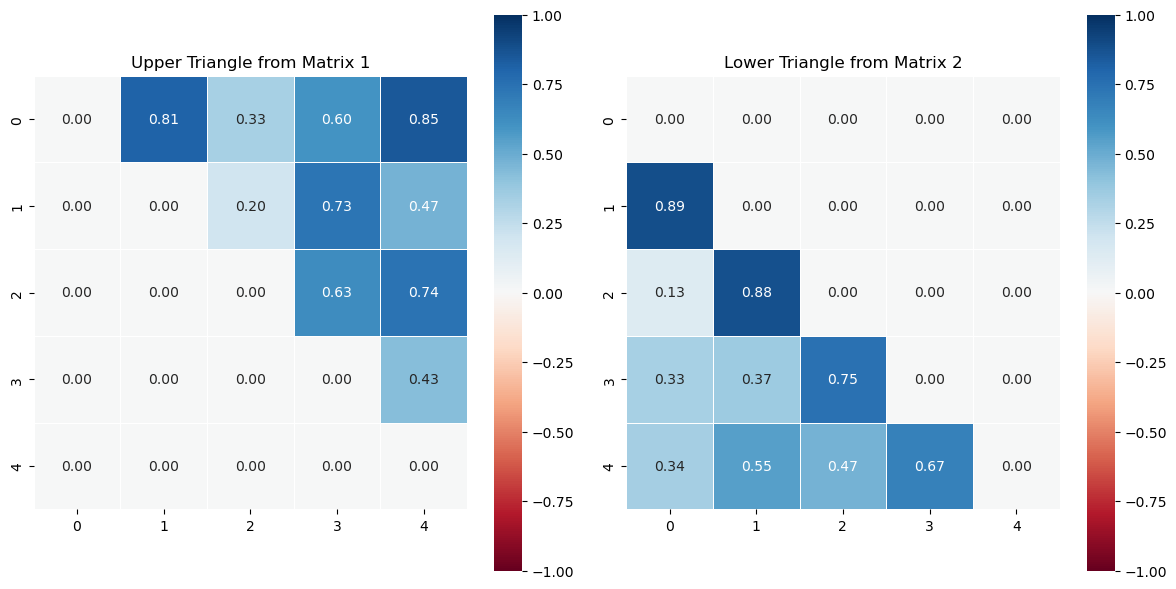

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_separated_correlation(matrix1, matrix2):
    # Ensure both matrices are NumPy arrays
    matrix1 = np.array(matrix1)
    matrix2 = np.array(matrix2)
    
    # Check that the matrices have the same dimensions
    assert matrix1.shape == matrix2.shape, "Matrices must have the same shape!"
    
    # Create masks for upper and lower triangles
    upper_triangle = np.triu(matrix1, k=1)  # Exclude diagonal
    lower_triangle = np.tril(matrix2, k=-1)  # Exclude diagonal

    # Plot upper triangle matrix
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(upper_triangle, annot=True, cmap="RdBu", vmin=-1, vmax=1, fmt=".2f", 
                square=True, cbar=True, linewidths=0.5)
    plt.title("Upper Triangle from Matrix 1")
    
    # Plot lower triangle matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(lower_triangle, annot=True, cmap="RdBu", vmin=-1, vmax=1, fmt=".2f", 
                square=True, cbar=True, linewidths=0.5)
    plt.title("Lower Triangle from Matrix 2")
    
    plt.tight_layout()
    plt.show()

# Example usage
matrix1 = np.random.rand(5, 5)
matrix2 = np.random.rand(5, 5)

# Make them symmetric to mimic correlation matrices
matrix1 = (matrix1 + matrix1.T) / 2
matrix2 = (matrix2 + matrix2.T) / 2

plot_separated_correlation(matrix1, matrix2)


PC1: 0.06 (-0.38, 0.69)
PC2: -0.03 (-0.56, 0.51)
PC3: -0.04 (-0.50, 0.17)
PC4: 0.02 (-0.38, 0.57)
PC5: -0.02 (-0.25, 0.22)
PC6: -0.03 (-0.40, 0.32)


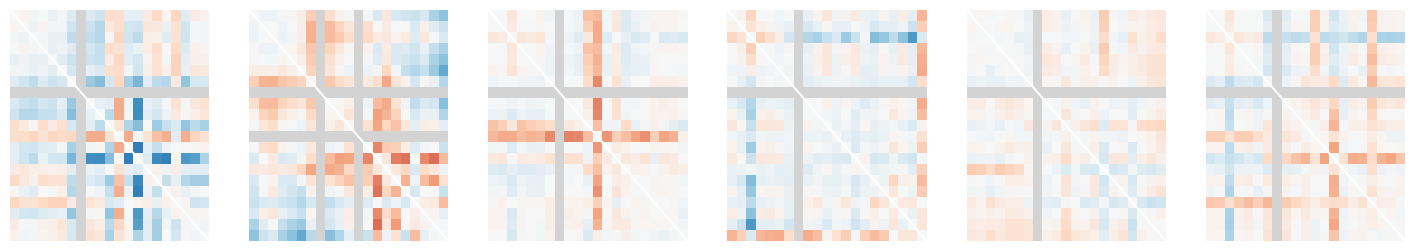

In [5]:

shapemode_dir = f"{cfg.PROJECT_DIR}/U2OS/warps_protein_avg_otsu"
fig,ax = plt.subplots(1, 6, figsize=(18, 3))
cmap = sns.color_palette("RdBu", as_cmap=True)
cmap.set_bad(color="lightgrey")  # This sets NaNs to be shown as grey

for pc in range(1,7):
    df0 = pd.read_csv(f"{shapemode_dir}/PC{pc}_bin0_pearsonr_df.csv", index_col=0)
    df6 = pd.read_csv(f"{shapemode_dir}/PC{pc}_bin6_pearsonr_df.csv", index_col=0)
    #print(df0)
    df_diff = df6 - df0
    df_diff = df_diff.where(~(df0.isna() | df6.isna()))
    sns.heatmap(df_diff, cmap=cmap, vmax=1, vmin=-1, center=0, ax=ax[pc-1], cbar=False)
    size = df0.shape[0]
    ax[pc - 1].plot([0, size], [0, size], color="white", linewidth=1.5, linestyle='-')
    ax[pc-1].axis('off')
    print(f'PC{pc}: {df_diff.mean().mean():.2f} ({df_diff.min().min():.2f}, {df_diff.max().max():.2f})')

(21, 21) (21, 21)
(21, 21) (21, 21)
(21, 21) (21, 21)
(21, 21) (21, 21)
(21, 21) (21, 21)
(21, 21) (21, 21)


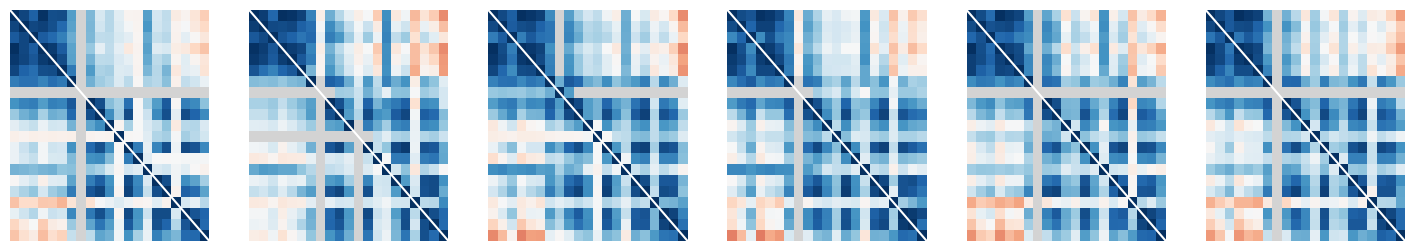

In [8]:
shapemode_dir = f"{cfg.PROJECT_DIR}/U2OS/warps_protein_avg_otsu"
fig,ax = plt.subplots(1, 6, figsize=(18, 3))
cmap = sns.color_palette("RdBu", as_cmap=True)
cmap.set_bad(color="lightgrey")  # This sets NaNs to be shown as grey

for pc in range(1,7):
    df0 = pd.read_csv(f"{shapemode_dir}/PC{pc}_bin0_pearsonr_df.csv", index_col=0)
    df6 = pd.read_csv(f"{shapemode_dir}/PC{pc}_bin6_pearsonr_df.csv", index_col=0)
    df = np.zeros_like(df0.values)
    print(df0.shape, df6.shape)
    # Fill upper triangle with values from df0
    triu_indices = np.triu_indices_from(df, k=1)
    df[triu_indices] = df0.values[triu_indices]

    # Fill lower triangle (including diagonal) with values from df6
    tril_indices = np.tril_indices_from(df, k=1)
    df[tril_indices] = df6.values[tril_indices]

    sns.heatmap(df, cmap=cmap, vmax=1, vmin=-1, center=0, ax=ax[pc - 1], cbar=False)
    size = df.shape[0]
    ax[pc - 1].plot([0, size], [0, size], color="white", linewidth=1.5, linestyle='-')
    ax[pc-1].axis('off')
plt.savefig(f"figs/U2OS_PC0vsPC6_pearsonr.png", dpi=300, bbox_inches='tight', pad_inches=0)

BJ (18, 18)


U2OS (21, 21)
A-431 (21, 21)
U-251_MG (18, 18)
MCF7 (18, 18)
HEK_293 (18, 18)
RT4 (18, 18)
Hep-G2 (21, 21)
HEL (18, 18)
K-562 (18, 18)


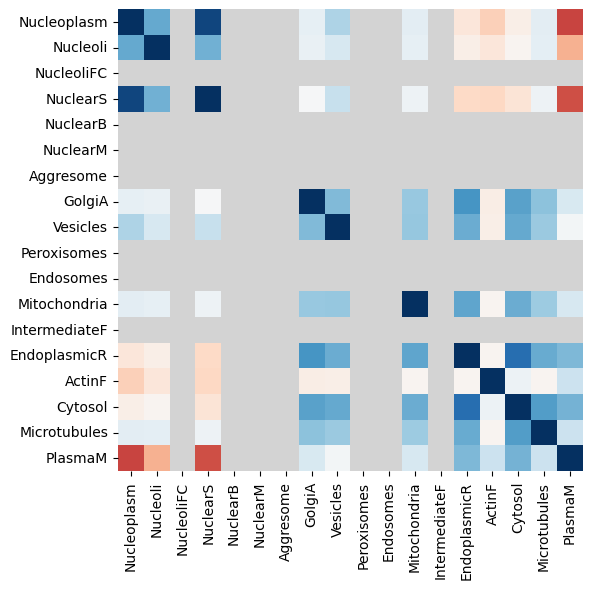

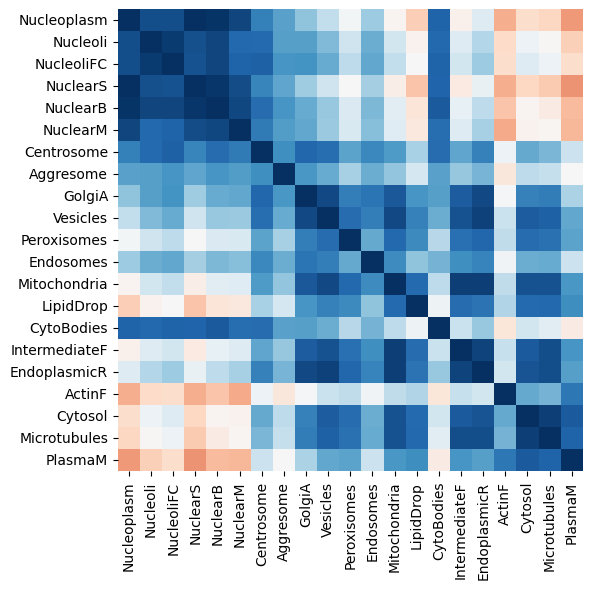

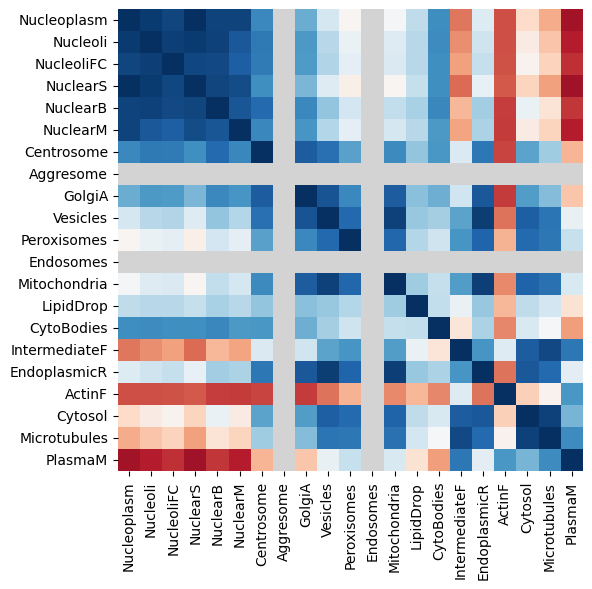

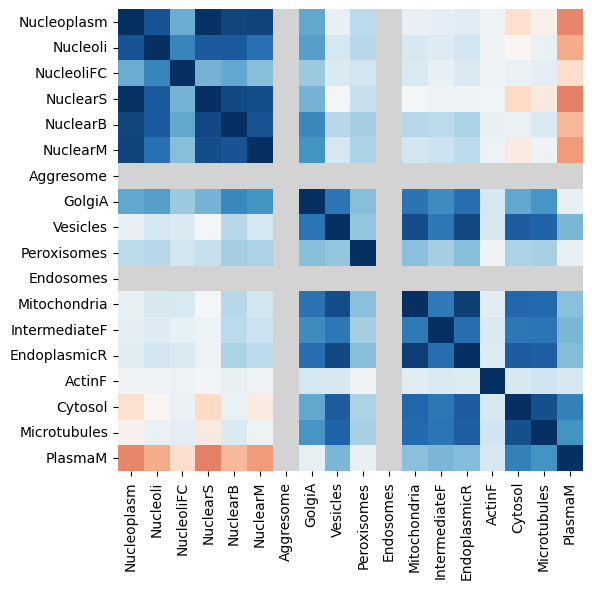

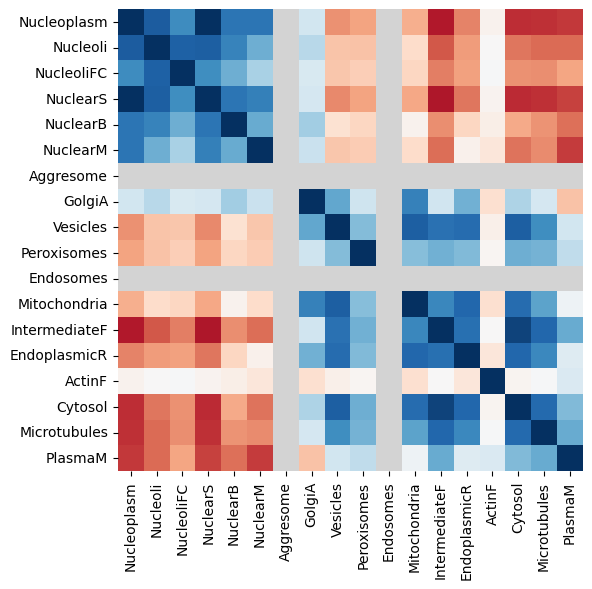

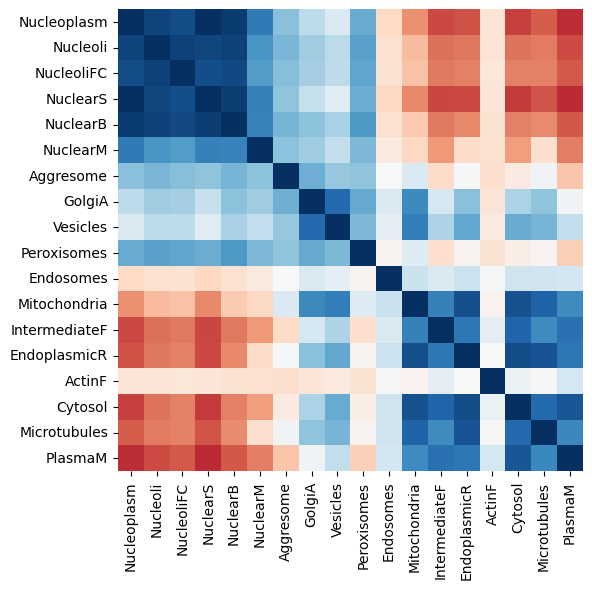

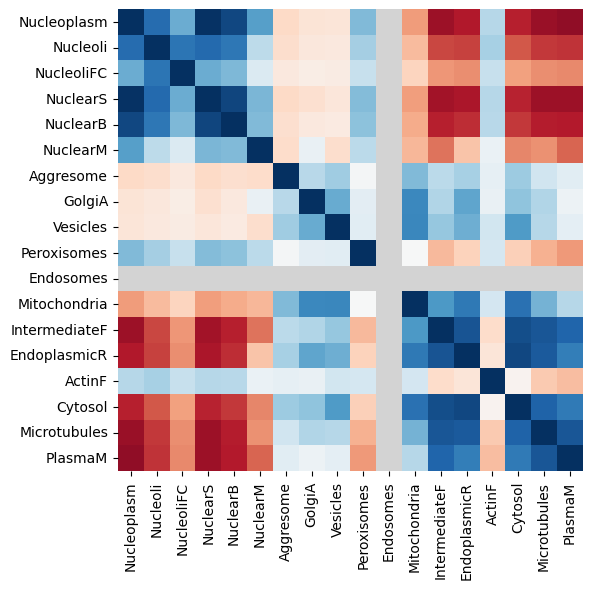

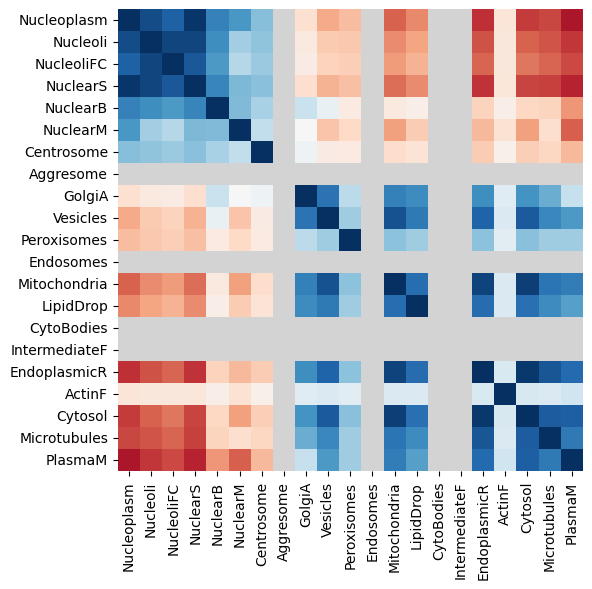

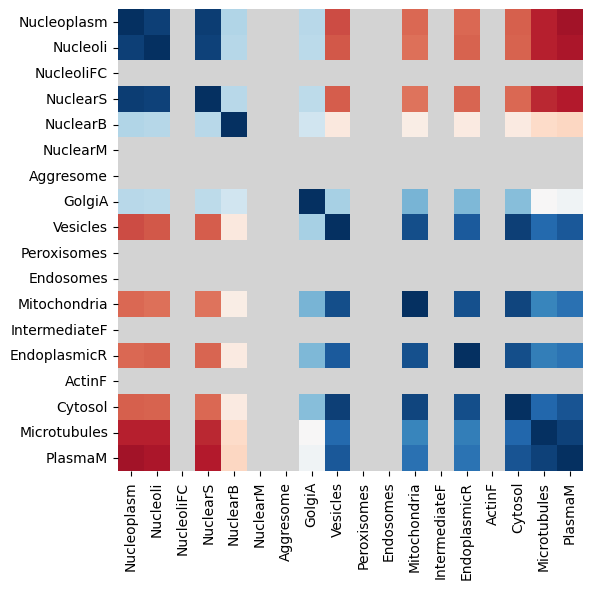

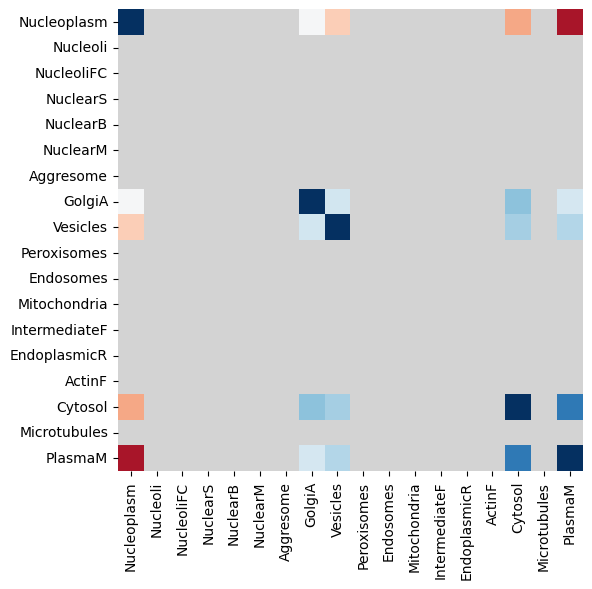

In [7]:
cmap = sns.color_palette("RdBu", as_cmap=True)
cmap = sns.color_palette("RdBu", as_cmap=True)
cmap.set_bad(color="lightgrey")  # This sets NaNs to be shown as grey

for cellline in cfg.CELL_LINE:
    df = pd.read_csv(f"{cfg.PROJECT_DIR}/{cellline}/warps_protein_avg_otsu/PC1_bin3_pearsonr_df.csv", index_col=0)
    print(cellline, df.shape)
    plt.figure(figsize=(6, 6))
    sns.heatmap(df, cmap=cmap, vmax=1, vmin=-1, center=0, cbar=False)
    plt.savefig(f"figs/{cellline}_avg_pearsonr.png", dpi=300, bbox_inches='tight', pad_inches=0)

In [5]:

import os
from utils.helpers import equidistance, get_line
from coefficients import coefs
from utils import helpers
def get_coefs(single_cell_id):
    fft_dir = f"{cfg.PROJECT_DIR}/U2OS/fftcoefs/{cfg.ALIGNMENT}"
    fft_path = os.path.join(fft_dir, f"fftcoefs_{cfg.N_COEFS}.txt")
    fft_coefs = get_line(fft_path, search_text=single_cell_id, mode="first")
    f_coef_n = fft_coefs.split(",")[1 : cfg.N_COEFS * 2 + 1]
    f_coef_n = [complex(s.replace("i", "j")) for s in f_coef_n]
    f_coef_c = fft_coefs.split(",")[cfg.N_COEFS * 2 + 1 :]
    f_coef_c = [complex(s.replace("i", "j")) for s in f_coef_c]
    ix_n, iy_n = coefs.inverse_fft(f_coef_n[0:cfg.N_COEFS], f_coef_n[cfg.N_COEFS:])
    ix_c, iy_c = coefs.inverse_fft(f_coef_c[0:cfg.N_COEFS], f_coef_c[cfg.N_COEFS:])
    return ix_n, iy_n, ix_c, iy_c

/home/trangle/miniconda3/envs/shapespace/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/trangle/miniconda3/envs/shapespace/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-205.24549434587203, 249.21368997381853, -569.143777280309, 546.9225894369903)

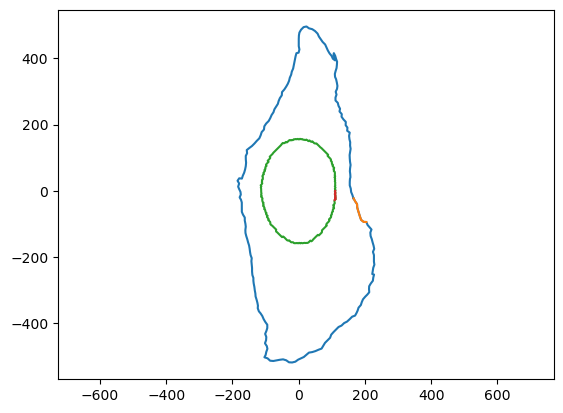

In [7]:
ix_n, iy_n, ix_c, iy_c = get_coefs("1089_B1_2_8")
plt.plot(ix_n, iy_n, label="nuclei")
plt.plot(ix_n[:10], iy_n[:10])
plt.plot(ix_c, iy_c, label="cell")
plt.plot(ix_c[:10], iy_c[:10])
plt.axis("equal")

([<matplotlib.axis.XTick at 0x79097c703e50>,
 [Text(0.0, 0, '0.0π'),
  Text(64.0, 0, '0.5π'),
  Text(128.0, 0, '1.0π'),
  Text(192.0, 0, '1.5π'),
  Text(256.0, 0, '2.0π')])

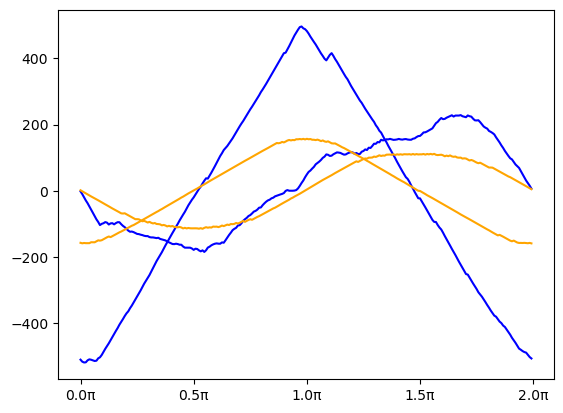

In [8]:
#ix_n, iy_n = equidistance(ix_n, iy_n, 360)
#ix_c, iy_c = equidistance(ix_c, iy_c, 360)
ticks = np.linspace(0, len(ix_n), 5)
ix_n = np.concatenate([ix_n[int(ticks[1]):], ix_n[:int(ticks[1])]])
ix_c = np.concatenate([ix_c[int(ticks[1]):], ix_c[:int(ticks[1])]])
iy_n = np.concatenate([iy_n[int(ticks[1]):], iy_n[:int(ticks[1])]])
iy_c = np.concatenate([iy_c[int(ticks[1]):], iy_c[:int(ticks[1])]])
plt.plot(ix_n, color="blue")
plt.plot(iy_n, color="blue")
#plt.plot(np.concatenate([ix_n, ix_n, ix_n]), color="blue", alpha=0.5)
plt.plot(ix_c, color="orange")
plt.plot(iy_c, color="orange")
#plt.plot(np.concatenate([ix_c, ix_c, ix_c]), color="orange", alpha=0.5)
# Customize the x-axis to display radians instead of range(0, 360)
ticks0 = np.linspace(0, 360, 5)  # Divide 0 to 360 into 5 intervals
tick_labels = [f"{tick/180:.1f}π" for tick in ticks0]  # Convert to multiples of π
plt.xticks(ticks=ticks, labels=tick_labels)


(-273.4938422686281,
 181.90615773137193,
 -480.69752126012884,
 361.77285503244696)

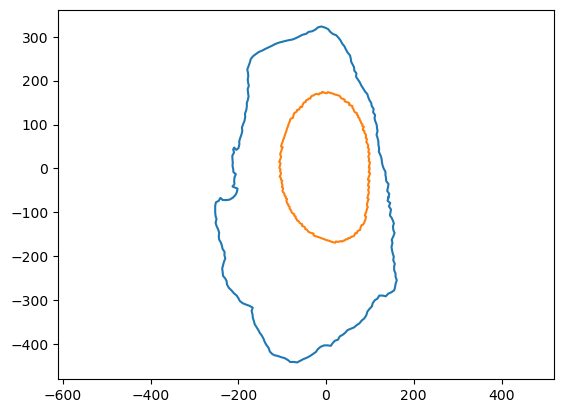

In [34]:
ix_n, iy_n, ix_c, iy_c = get_coefs("1089_B1_2_14")
plt.plot(ix_n, iy_n, label="nuclei")
plt.plot(ix_c, iy_c, label="nuclei")
plt.axis("equal")

# All cell line shapespace

In [7]:
shape_mode_path = "/data/2Dshapespace/all_celllines/shapemode/fft_cell_major_axis_polarized_cell_nuclei"
df_trans = pd.read_csv(f"{shape_mode_path}/transformed_matrix.csv")

In [9]:
import json
f = open(f"{shape_mode_path}/cells_assigned_to_pc_bins.json", "r")
cells_assigned = json.load(f)
#cells_assigned['PC1']

[[312,
  702,
  2438,
  2690,
  3957,
  5289,
  5989,
  6491,
  8038,
  8376,
  9120,
  9260,
  12351,
  13079,
  14206,
  14487,
  14610,
  15158,
  17144,
  19122,
  19339,
  21603,
  21658,
  23130,
  23196,
  29692,
  30207,
  30713,
  31091,
  31508,
  31986,
  32195,
  32672,
  33133,
  35114,
  39020,
  40303,
  41531,
  43672,
  44161,
  45122,
  45174,
  45379,
  45832,
  46254,
  46814,
  46815,
  46909,
  47293,
  47501,
  47614,
  48309,
  48504,
  48562,
  49163,
  49209,
  49320,
  49730,
  49841,
  50191,
  50289,
  50842,
  51014,
  51656,
  51791,
  52170,
  52888,
  58552,
  59744,
  63067,
  64069,
  64875,
  64883,
  64929,
  65131,
  65194,
  65465,
  65864,
  66175,
  66738,
  66761,
  66919,
  66957,
  67725,
  68241,
  68341,
  69229,
  69338,
  70332,
  70564,
  70651,
  70673,
  70745,
  70836,
  70997,
  71266,
  71549,
  72320,
  73033,
  73200,
  74218,
  79140,
  79531,
  79993,
  80128,
  80395,
  80481,
  80578,
  80736,
  80836,
  80890,
  80938,
  8096

# CCD and non CCD proteins' variation acros shapespace (ICA)

In [ ]:
# PGM2L1 - cellnu ratio PC8